**Chapter 1 of Data Science From Scratch by Joel Grus**

**Finding Key Connectors**

In [1]:
users = [
    {'id': 0, 'name': 'Hero'},
    {'id': 1, 'name': 'Dunn'},
    {'id': 2, 'name': 'Sue'},
    {'id': 3, 'name': 'Chi'},
    {'id': 4, 'name': 'Thor'},
    {'id': 5, 'name': 'Clive'},
    {'id': 6, 'name': 'Hicks'},
    {'id': 7, 'name': 'Devin'},
    {'id': 8, 'name': 'Kate'},
    {'id': 9, 'name': 'Klein'},
]

In [2]:
friendship_pairs = [
    (0,1),
    (0,2),
    (1,2),
    (1,3),
    (2,3),
    (3,4),
    (4,5),
    (5,6),
    (5,7),
    (6,8),
    (7,8),
    (8,9)
]

In [3]:
friendships = {user['id']: [] for user in users}

In [4]:
for i, j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)

In [5]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [6]:
def number_of_friends(user):
    user_id = user['id']
    friend_ids = friendships[user_id]
    return len(friend_ids)

In [7]:
total_connections = sum(number_of_friends(user) for user in users)
total_connections

24

In [8]:
num_users = len(users)
num_users

10

In [9]:
avg_connections = total_connections / num_users
avg_connections

2.4

In [10]:
num_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [11]:
num_friends_by_id.sort(
key=lambda id_and_friends: id_and_friends[1], reverse=True)
num_friends_by_id
# sorting users by most to least friends
# who is most central to the network

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [12]:
# Network metric: Degree Centrality, who is holding the network/cluster together?

**Data Scientists You May Know**

In [13]:
def friend_of_friends_ok(user):
    return [friend_of_friends_id 
            for friend_id in friendships[user['id']]
            for friend_of_friends_id in friendships[friend_id]]
friend_of_friends_ok(users[0])

[0, 2, 3, 0, 1, 3]

In [14]:
print(friendships[0])
print(friendships[1])
print(friendships[2])
# friendships connections, mutuals

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [15]:
from collections import Counter

In [16]:
def friends_of_friends(users):
    user_id = users['id']
    return Counter(
        friend_of_friends_id 
        for friend_id in friendships[user_id]                # for each of my frends
        for friend_of_friends_id in friendships[friend_id]   # find their friends
        if friend_of_friends_id != user_id                   # who aren't me
        and friend_of_friends_id not in friendships[user_id] # and aren't my friends
    )

friend= int(input('For which friend do you want to see their friends of friends (and how many mutual friends they have together)?'))
print(friends_of_friends(users[friend]))

For which friend do you want to see their friends of friends (and how many mutual friends they have together)?7
Counter({6: 2, 4: 1, 9: 1})


In [17]:
# mutual interests of friend network
interests = [(0, "Hadoop"), (0, 'Big Data'), (0, 'HBase'), (0, 'Java'), (0, 'Spark'), (0, 'Storm'), (0, 'Cassandra'), (1, 'MongoDB'), (1, 'Cassandra'), (1, 'HBase'),(1, 'Postgres'), (2, 'Python'), (2, 'scikit-learn'), (2, 'scipy'), (2, 'numpy'), (2, 'statsmodels'), (2, 'pandas'), (3, 'R'), (3, 'Python'), (3, 'statistics'), (3, 'regression'), (3, 'probability'), (4, 'machine learning'), (4, 'regression'), (4, 'decision trees'), (4, 'libsvm'), (5, 'Python'), (5, 'R'), (5, 'Java'), (5, 'C++'), (5, 'Haskell'), (5, 'programming languages'), (6, 'statistics'), (6, 'probability'), (6, 'mathematics'), (6, 'theory'), (7, 'machine learning'), (7, 'scikit-learn'), (7, 'Mahout'), (7, 'neural networks'), (8, 'neural networks'), (8, 'deep learning'), (8, 'Big Data'), (8, 'artificial intelligence'), (9, 'Hadoop'), (9, 'Java'), (9, 'MapReduce'), (9, 'Big Data')]
interests

[(0, 'Hadoop'),
 (0, 'Big Data'),
 (0, 'HBase'),
 (0, 'Java'),
 (0, 'Spark'),
 (0, 'Storm'),
 (0, 'Cassandra'),
 (1, 'MongoDB'),
 (1, 'Cassandra'),
 (1, 'HBase'),
 (1, 'Postgres'),
 (2, 'Python'),
 (2, 'scikit-learn'),
 (2, 'scipy'),
 (2, 'numpy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'R'),
 (3, 'Python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'Python'),
 (5, 'R'),
 (5, 'Java'),
 (5, 'C++'),
 (5, 'Haskell'),
 (5, 'programming languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'scikit-learn'),
 (7, 'Mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'Big Data'),
 (8, 'artificial intelligence'),
 (9, 'Hadoop'),
 (9, 'Java'),
 (9, 'MapReduce'),
 (9, 'Big Data')]

In [18]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]
data_scientists_who_like('Big Data')

[0, 8, 9]

In [19]:
from collections import defaultdict
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
user_ids_by_interest
# how to find/query for user id by interests

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': [8],
             'artifici

In [20]:
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
interests_by_user_id
# how to find/query for interests by user id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
              'B

In [37]:
def most_common_interests_with(users):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[users['id']]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != users['id'])

user = int(input("For which user do you want to find people in their friends network with common interests?"))
most_common_interests_with(users[user])
# key=friend: value=number of number of common interests

For which user do you want to find people in their friends network with common interests?9


Counter({0: 3, 5: 1, 8: 1})

**Salaries and Experience**

In [57]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1), (48000, 0.7), (76000, 6), (69000, 6.5), (76000, 7.5), (60000, 2.5), (83000, 10), (48000, 1.9), (63000, 4.2)]
salaries_and_tenures

[(83000, 8.7),
 (88000, 8.1),
 (48000, 0.7),
 (76000, 6),
 (69000, 6.5),
 (76000, 7.5),
 (60000, 2.5),
 (83000, 10),
 (48000, 1.9),
 (63000, 4.2)]

[8.7, 8.1, 0.7, 6, 6.5, 7.5, 2.5, 10, 1.9, 4.2]


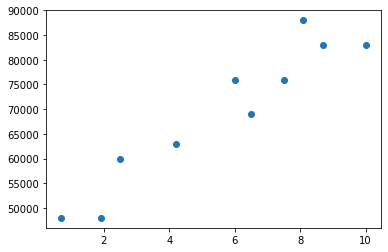

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

data = salaries_and_tenures
x = [x[1] for x in data]
y = [x[0] for x in data]

print(x)
plt.scatter(x,y)
plt.show()

In [66]:
import pandas as pd
df = pd.DataFrame.from_records(salaries_and_tenures)
df

,0,1
0,83000,8.7
1,88000,8.1
2,48000,0.7
3,76000,6.0
4,69000,6.5
5,76000,7.5
6,60000,2.5
7,83000,10.0
8,48000,1.9
9,63000,4.2


In [68]:
df.columns = ['Salary', 'Tenure']
df

,Salary,Tenure
0,83000,8.7
1,88000,8.1
2,48000,0.7
3,76000,6.0
4,69000,6.5
5,76000,7.5
6,60000,2.5
7,83000,10.0
8,48000,1.9
9,63000,4.2


In [69]:
df['Salary'].mean()

69400.0

In [72]:
df['Salary'].max()

88000

In [97]:
df['Tenure'].mean()

5.61

In [73]:
df['Tenure'].max()

10.0

In [112]:
id = int(input("Which id do you want to query for their length of tenure?"))
tenure = df['Tenure'][id]
def tenure_bucket(tenure):
    if tenure < 2:
        return 'less than two'
    elif tenure < 5:
        return 'between 2 and 5'
    else:
        return 'more than five'
tenure_bucket(tenure)

Which id do you want to query for their length of tenure?0


'more than five'

In [125]:
df['Tenure'].le(2)

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: Tenure, dtype: bool

In [126]:
df['Tenure'].ge(5)

0     True
1     True
2    False
3     True
4     True
5     True
6    False
7     True
8    False
9    False
Name: Tenure, dtype: bool

In [127]:
df['Tenure'].between(2, 5)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9     True
Name: Tenure, dtype: bool

**Topics of Interest**

In [129]:
words_and_counts = Counter(word
                          for user, interest in interests
                          for word in interest.lower().split())
words_and_counts

Counter({'hadoop': 2,
         'big': 3,
         'data': 3,
         'hbase': 2,
         'java': 3,
         'spark': 1,
         'storm': 1,
         'cassandra': 2,
         'mongodb': 1,
         'postgres': 1,
         'python': 3,
         'scikit-learn': 2,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'learning': 3,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'neural': 2,
         'networks': 2,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

In [130]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
